In [33]:
from simulation_matrix import build_A_matrix
from simulation_cykly import simulation_step
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import json
import time

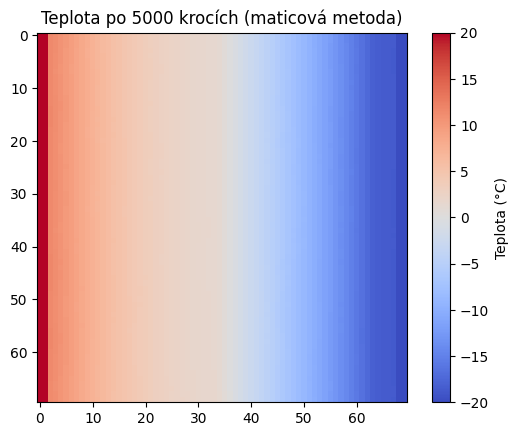

'\n# Simulace pomocí výpočetního cyklu\nu_sim_loop = np.copy(u)\n\nfor t in range(2000):\n    u_sim_loop = simulation_step(u_sim_loop, lam, rho_c, dx, dy, dt)\n\n# Vykreslení výsledku po 2000 krocích (cyklická metoda)\nplt.imshow(u_sim_loop, cmap=\'coolwarm\', vmin=-20, vmax=20)\nplt.title("Teplota po 2000 krocích (cyklická metoda)")\nplt.colorbar(label="Teplota (°C)")\nplt.show()\n'

In [34]:
# Načtení parametrů
with open('data/cihly/parametry.json') as f:
    data = json.load(f)

dx = data['dx']
dy = data['dy']
dt = data['dt']

# Načtení dat
lam = np.load('data/cihly/LAM.npy')
rho_c = np.load('data/cihly/RHO_C.npy')
u = np.load('data/cihly/U_initial.npy')

u_sim = np.copy(u)

# Sestavení matice A pro maticovou simulaci
A = build_A_matrix(lam, rho_c, dx, dy, dt)

# Simulace pomocí maticového násobení
u_vec = u.flatten()
for t in range(5000):
    u_vec = u_vec + (A @ u_vec)

u_sim_matrix = u_vec.reshape(u.shape)

# Vykreslení výsledku po 5000 krocích (maticová metoda)
plt.imshow(u_sim_matrix, cmap='coolwarm', vmin=-20, vmax=20)
plt.title("Teplota po 5000 krocích (maticová metoda)")
plt.colorbar(label="Teplota (°C)")
plt.show()
'''
# Simulace pomocí výpočetního cyklu
u_sim_loop = np.copy(u)

for t in range(2000):
    u_sim_loop = simulation_step(u_sim_loop, lam, rho_c, dx, dy, dt)

# Vykreslení výsledku po 2000 krocích (cyklická metoda)
plt.imshow(u_sim_loop, cmap='coolwarm', vmin=-20, vmax=20)
plt.title("Teplota po 2000 krocích (cyklická metoda)")
plt.colorbar(label="Teplota (°C)")
plt.show()
'''


In [35]:
# --- Simulace pomocí cyklu ---
u_loop = u.copy()
start = time.time()
for _ in range(1000):
    u_loop = simulation_step(u_loop, lam, rho_c, dx, dy, dt)
time_loop = time.time()
print("Cyklus:", round(time_loop - start), "sekund")

# --- Simulace pomocí maticového násobení ---
u_vec = u.flatten()
start = time.time()
for _ in range(1000):
    u_vec = u_vec + A @ u_vec
time_matrix = time.time()
u_matrix = u_vec.reshape(u.shape)
print("Matice:", round(time_matrix - start), "sekund")


Cyklus: 25 sekund
Matice: 0 sekund


Animace byla uložena jako teplo_animace_cihly.gif


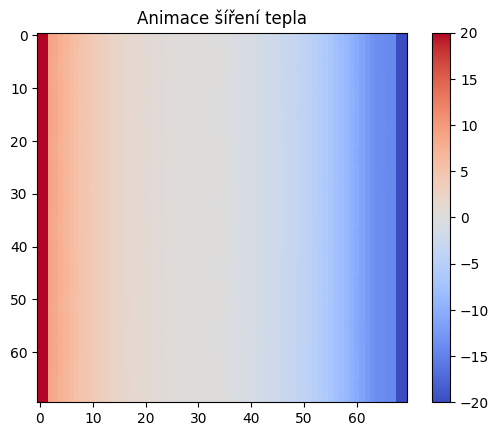

In [36]:
A = build_A_matrix(lam, rho_c, dx, dy, dt)

u_vec = u.flatten()

# Seznam všech snímků
frames_data = []

for _ in range(200):
    for _ in range(10):
        u_vec = u_vec + A @ u_vec
    frames_data.append(u_vec.reshape(u.shape))

# Vykreslení
fig, ax = plt.subplots()
img = ax.imshow(frames_data[0], cmap='coolwarm', vmin=-20, vmax=20)
plt.colorbar(img, ax=ax)
plt.title("Animace šíření tepla")

# Funkce pro aktualizaci snímku
def animate(frame):
    img.set_data(frames_data[frame])
    return [img]

anim = animation.FuncAnimation(fig, animate, frames=len(frames_data), interval=50, blit=True)

anim.save("teplo_animace_cihly.gif", writer="pillow", fps=20)

print("Animace byla uložena jako teplo_animace_cihly.gif")


Animace byla uložena jako teplo_animace_spirala.gif


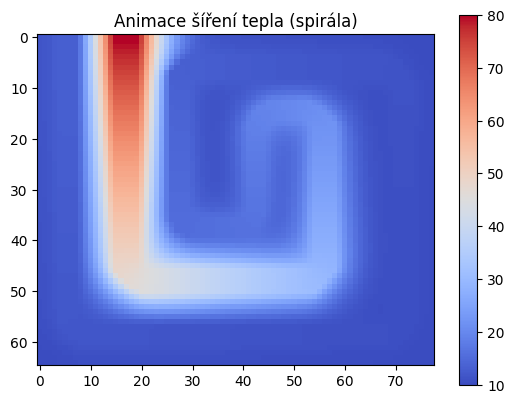

In [29]:
# Sestavení matice A pro maticovou simulaci
A = build_A_matrix(lam, rho_c, dx, dy, dt)

u_vec = u.flatten()

# Seznam všech snímků
frames_data = []

for _ in range(400):
    for _ in range(100):
        u_vec = u_vec + A @ u_vec
    frames_data.append(u_vec.reshape(u.shape))

# Vykreslení
fig, ax = plt.subplots()
img = ax.imshow(frames_data[0], cmap='coolwarm', vmin=10, vmax=80)
plt.colorbar(img, ax=ax)
plt.title("Animace šíření tepla (spirála)")

# Funkce pro aktualizaci snímku
def animate(frame):
    img.set_data(frames_data[frame])
    return [img]

anim = animation.FuncAnimation(fig, animate, frames=len(frames_data), interval=50, blit=True)

# Uložení animace
anim.save("teplo_animace_spirala.gif", writer="pillow", fps=20)

print("Animace byla uložena jako teplo_animace_spirala.gif")
